In [1]:
import pandas as pd
df = pd.read_csv("drug.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [2]:
X= df.drop('Drug',axis='columns')
y=df['Drug']

In [3]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [4]:
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le_sex=LabelEncoder()
le_bp=LabelEncoder()
le_cholesterol=LabelEncoder()

In [10]:
X['sex_n']=le_sex.fit_transform(X['Sex'])
X['bp_n']=le_sex.fit_transform(X['BP'])
X['cholesterol_n']=le_sex.fit_transform(X['Cholesterol'])

In [11]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K,sex_n,bp_n,cholesterol_n
0,23,F,HIGH,HIGH,25.355,0,0,0
1,47,M,LOW,HIGH,13.093,1,1,0
2,47,M,LOW,HIGH,10.114,1,1,0
3,28,F,NORMAL,HIGH,7.798,0,2,0
4,61,F,LOW,HIGH,18.043,0,1,0


In [12]:
X_n = X.drop(['Sex','BP','Cholesterol'],axis='columns')
X_n

,Age,Na_to_K,sex_n,bp_n,cholesterol_n
0,23,25.355,0,0,0
1,47,13.093,1,1,0
2,47,10.114,1,1,0
3,28,7.798,0,2,0
4,61,18.043,0,1,0
...,...,...,...,...,...
195,56,11.567,0,1,0
196,16,12.006,1,1,0
197,52,9.894,1,2,0
198,23,14.020,1,2,1


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X_n,y,test_size=0.2)

In [31]:
X_train

,Age,Na_to_K,sex_n,bp_n,cholesterol_n
129,32,7.477,0,2,0
73,41,22.905,0,2,1
173,41,18.739,0,1,1
25,28,18.809,0,0,1
36,32,9.445,1,0,1
...,...,...,...,...,...
181,59,13.884,0,2,0
192,72,16.310,1,1,0
170,28,12.879,0,2,0
5,22,8.607,0,2,0


In [32]:
X_test

,Age,Na_to_K,sex_n,bp_n,cholesterol_n
20,57,19.128,1,1,1
17,43,13.972,1,0,0
126,66,16.347,1,0,0
122,34,22.456,1,2,0
6,49,16.275,0,2,0
138,51,11.343,1,0,1
13,74,20.942,0,1,0
30,18,8.750,0,2,1
14,50,12.703,0,2,0
102,28,13.127,0,1,0


In [33]:
from sklearn import tree
model= tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.975
Classification Report:
              precision    recall  f1-score   support

       drugA       0.83      1.00      0.91         5
       drugB       1.00      0.75      0.86         4
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00         8
       drugY       1.00      1.00      1.00        18

    accuracy                           0.97        40
   macro avg       0.97      0.95      0.95        40
weighted avg       0.98      0.97      0.97        40



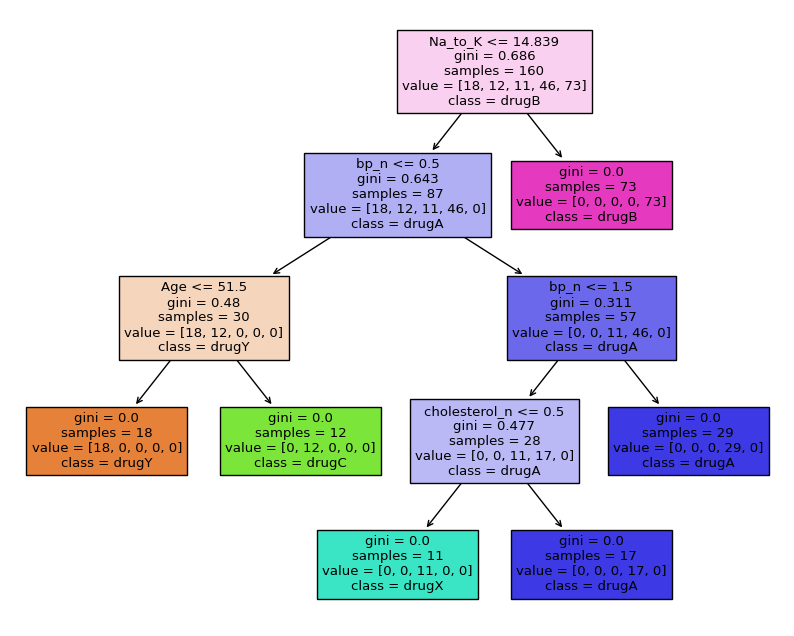

In [45]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 8))
plot_tree(model, feature_names=X_n.columns.tolist(), class_names=y.unique().tolist(), filled=True)
plt.show()